### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [21]:
X_train.shape

(80, 5)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

In [31]:
# roughwork




(80, 1)

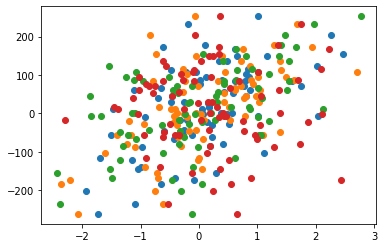

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Your code here
for i in range(1,5):
  plt.scatter(X_train[:,i-1:i],y_train)
weight=np.random.rand(X_train.shape[1],1);
bias=np.random.rand(X_train.shape[0],1);
bias.shape

You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [34]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001, n_iters=1000):
        # Your code here

        self.weight=np.random.rand(X_train.shape[1],1);
        self.bias=np.random.rand(X_train.shape[0],1);

        pass  # Uncomment this when you're done with this function


    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
        # Gradient Descent code goes here
        w=self.weight;
        b=self.bias
        def CostFunction(x,y,w,b):
          cost = np.sum((((x.dot(weight) + bias) - y) ** 2) / (2*len(y)))
          return cost
       
        def GradientDescent(x, y, w, b, learning_rate, n_iters):
           cost_list = [0] * n_iters
           for epoch in range(n_iters):
              z = x.dot(w) + b
              loss = z - y
              weight_gradient = x.T.dot(loss) / len(y)
              bias_gradient = np.sum(loss) / len(y)
              w = (w - (weight_gradient*learning_rate))
              b = (b - (bias_gradient*learning_rate))
              cost = CostFunction(x, y, w, b)
              cost_list[epoch] = cost
              
           return w, b, cost_list

         # Uncomment this when you're done with this function
        
        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
        # Code goes here
        return  np.dot(X_train,self.weight)+ self.bias

          # Uncomment this when you're done with this function

### Initializing, Training & Predictions

In [35]:
# Now, we make an object of our custom class.
regressor = LinearRegression() # You may pass the custom parameters or let the default values take it ahead

# Call the fit method on the object to train (pass appropriate part of dataset)
regressor.fit(X_train,y_train)

# Now, let's see our what our model predicts
predictions = regressor.predict(X_train) # pass appropriate part of dataset

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [36]:
def mean_squared_error(y_true, y_pred):
       # return the mean squared error
       from sklearn.metrics import mean_squared_error
       return mean_squared_error(y_true, y_pred)
        # Uncomment this when you're done with this function


def r2_score(y_true, y_pred):
      # return the r2 score
      from sklearn.metrics import r2_score
      return r2_score(y_true, y_pred)
      return
      # Uncomment this when you're done with this function
          

mse = mean_squared_error(y_train,predictions) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_train,predictions) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: 11566.599682942204
Accuracy: 0.001663731221014375
